In [2]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [3]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### k-Means on a randomly generated dataset

In [4]:
random = np.random.seed(0)

In [5]:
# blobs
X, y = make_blobs(n_samples = 5000, centers = [[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std = 0.9)

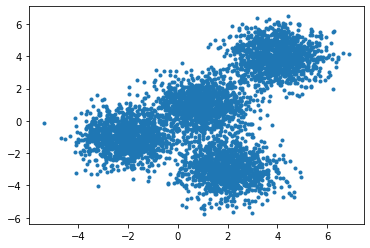

In [6]:
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], marker = ".")
plt.show()

In [7]:
# k_means
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(n_clusters=4, n_init=12)

**Now let's fit the KMeans model with the feature matrix we created above, X**

In [8]:
# Fitting
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
# Labels
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0])

In [10]:
# Coordinates of cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

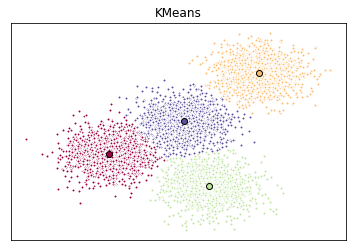

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


**k-means clustering with 3 clusrers**

In [12]:
# k-means
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3

KMeans(n_clusters=3, n_init=12)

In [13]:
# Fitting
k_means3.fit(X)

KMeans(n_clusters=3, n_init=12)

In [14]:
# Labels
k_means3_labels = k_means3.labels_
k_means3_labels

array([2, 0, 0, ..., 1, 2, 2])

In [15]:
k_means3_cluster_centers = k_means3.cluster_centers_
k_means3_cluster_centers

array([[ 2.01695379, -2.9407743 ],
       [ 3.70503248,  3.70030577],
       [-0.80734076, -0.16767479]])

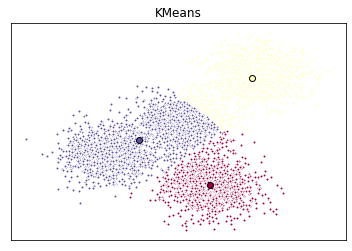

In [19]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means3_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means3_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


### Customer Segmentation with K-Means

In [20]:
import numpy as np
import pandas as pd

### Load Data From CSV File

In [21]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

In [22]:
df = df.drop("Address", axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**Normalization**

In [23]:
from sklearn.preprocessing import StandardScaler
X = df.values[:, 1:] # Customer Id not included
X = np.nan_to_num(X) # replaces nan to 0
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling

In [24]:
# Object
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [25]:
# Fit
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [26]:
# labels
labels = k_means.labels_
print(labels[0:5])

[1 0 1 1 2]


### Insights

In [27]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [28]:
# We can easily check the centroid values by averaging the features in each cluster
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


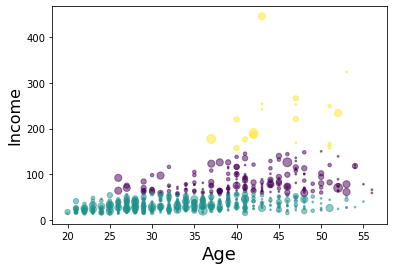

In [29]:
# Now, lets look at the distribution of customers based on their age and income:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

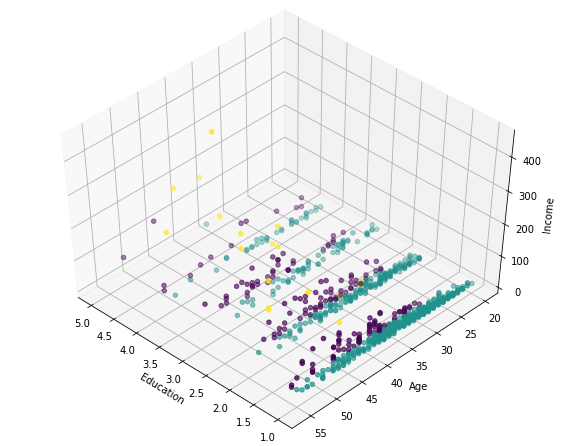

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
#plt.ylabel('Age', fontsize=18)
#plt.xlabel('Income', fontsize=16)
#plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
